In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize to [0,1] range
x_train = x_train.reshape(-1, 28, 28, 1)  # Reshape for ConvNet
x_test = x_test.reshape(-1, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# Convert dataset to DataFrame and show head
train_df = pd.DataFrame(x_train.reshape(x_train.shape[0], -1))
train_df['digit'] = y_train
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,digit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


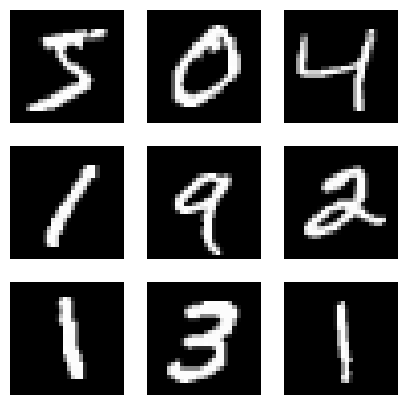

In [5]:
# Display some digits
fig, axes = plt.subplots(3, 3, figsize=(5, 5))
axes = axes.ravel()  # Flatten the 2D array of axes

for i in range(9):  # Display 16 images
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')

plt.show()

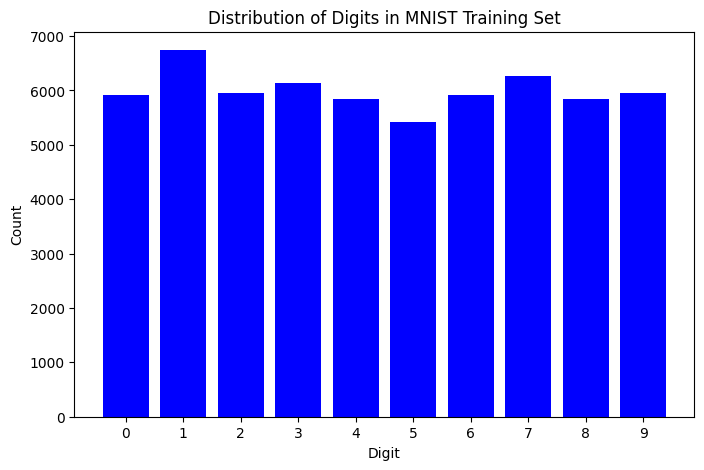

In [6]:
# Plot number of occurrences of each digit
unique, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(8, 5))
plt.bar(unique, counts, color='blue')
plt.xlabel("Digit")
plt.ylabel("Count")
plt.title("Distribution of Digits in MNIST Training Set")
plt.xticks(unique)
plt.show()

In [18]:
# Define the LeNet-5 model
def build_lenet5():
    model = keras.Sequential([
        layers.Conv2D(6, kernel_size=5, activation='tanh', input_shape=(28, 28, 1)),
        layers.AveragePooling2D(pool_size=2, strides=2),
        layers.Conv2D(16, kernel_size=5, activation='tanh'),
        layers.AveragePooling2D(pool_size=2, strides=2),
        layers.Flatten(),
        layers.Dense(120, activation='tanh'),
        layers.Dense(84, activation='tanh'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Build and compile the model
LeNet5 = build_lenet5()
LeNet5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
LeNet5.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 12, 12, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_train)

# Train the model with data augmentation
leNet5_history = LeNet5.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10, validation_data=(x_test, y_test))


# Evaluate the model
y_pred = np.argmax(LeNet5.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.7266 - loss: 0.8460 - val_accuracy: 0.9646 - val_loss: 0.1112
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9428 - loss: 0.1824 - val_accuracy: 0.9739 - val_loss: 0.0839
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9590 - loss: 0.1309 - val_accuracy: 0.9828 - val_loss: 0.0543
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9682 - loss: 0.1021 - val_accuracy: 0.9817 - val_loss: 0.0565
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.9732 - loss: 0.0881 - val_accuracy: 0.9823 - val_loss: 0.0528
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.9727 - loss: 0.0878 - val_accuracy: 0.9841 - val_loss: 0.0457
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9765 - loss: 0.0767 - val_accuracy: 0.9882 - val_loss: 0.0383
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.9776 - loss: 0.07

In [20]:
# Define a custom CNN model
def build_custom_model():
    model = keras.Sequential([
        layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=2, strides=2),
        layers.Conv2D(64, kernel_size=3, activation='relu'),
        layers.MaxPooling2D(pool_size=2, strides=2),
        layers.Conv2D(128, kernel_size=3, activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Build and compile custom model
custom_model = build_custom_model()
custom_model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
custom_model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 249,162 (973.29 KB)

 Trainable params: 249,162 (973.29 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
print("Training Custom Model...")
custom_history  = custom_model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=5, validation_data=(x_test, y_test))

# Evaluate  model
y_pred_custom = np.argmax(custom_model.predict(x_test), axis=1)

print("Custom Model Classification Report:")
print(classification_report(y_test, y_pred_custom))

Training Custom Model...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 38ms/step - accuracy: 0.4062 - loss: 1.7721 - val_accuracy: 0.9427 - val_loss: 0.1911
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.8971 - loss: 0.3318 - val_accuracy: 0.9670 - val_loss: 0.1113
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9384 - loss: 0.1994 - val_accuracy: 0.9774 - val_loss: 0.0715
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - accuracy: 0.9513 - loss: 0.1561 - val_accuracy: 0.9787 - val_loss: 0.0640
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9599 - loss: 0.1281 - val_accuracy: 0.9844 - val_loss: 0.0480
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Custom Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
       

In [23]:
# Convert history to DataFrame
history_df = pd.DataFrame(leNet5_history.history).add_prefix("LeNet5_")
custom_history_df = pd.DataFrame(custom_history.history).add_prefix("Custom_")

# Combine and display
combined_df = pd.concat([history_df, custom_history_df], axis=1)
print(combined_df.head())

   LeNet5_accuracy  LeNet5_loss  LeNet5_val_accuracy  LeNet5_val_loss  \
0         0.843983     0.497121               0.9646         0.111170   
1         0.949400     0.162693               0.9739         0.083903   
2         0.961600     0.124903               0.9828         0.054299   
3         0.967967     0.104425               0.9817         0.056478   
4         0.971800     0.091945               0.9823         0.052848   

   Custom_accuracy  Custom_loss  Custom_val_accuracy  Custom_val_loss  
0         0.619267     1.176372               0.9427         0.191112  
1         0.912667     0.283215               0.9670         0.111311  
2         0.942050     0.186085               0.9774         0.071494  
3         0.953283     0.148307               0.9787         0.063983  
4         0.961850     0.123341               0.9844         0.048002  
